__Hydrograph Development Notebooks__ 


__Unpublished USGS Gage Data Comparison__


PYTHON
  
  
Overview: This notebook was created to evaluate the hypothetical stretched & smoothed hydrograph used for the Tioughnioga River example notebooks (Lise & Whitney Point, NY). Following the development of the approximate H&H studies outlined in these notebooks, the USGS sent an event hydrograph not published online upon request. The shape, volume and duratation of this event is compared to the hypothetical 1% hydrograph developed and used for unsteady breach flows developed in this repo.

Updated 1.10.2017

In [1]:
import os
from glob import glob

from importlib import reload
import utils; reload(utils)
from utils import *

import pandas as pd
import numpy as np
from scipy import interpolate 

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###  Read in Gage data & Develop Base Hydrograph
    1. Read in Base Hydrograph & Scale to 1-pct using scale factor
    2. Manually Smooth the curve where needed
    
*See comment lines in [Helper Script](ny_clean_nb.py) for smoothing procedure.*

01509000_00060_dv.tsv
01509000_00060_iv.tsv
01509000_00065_iv.tsv
01509520_00065_iv.tsv
01511500_00060_iv.tsv
01511500_00065_iv.tsv




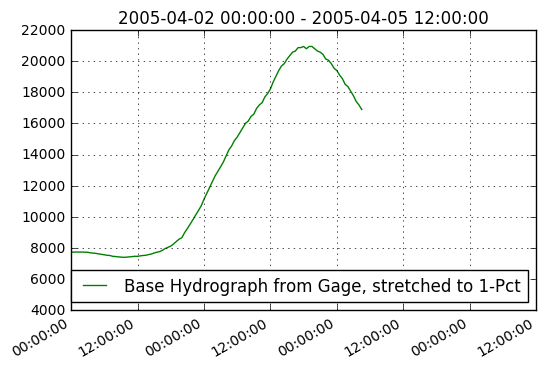

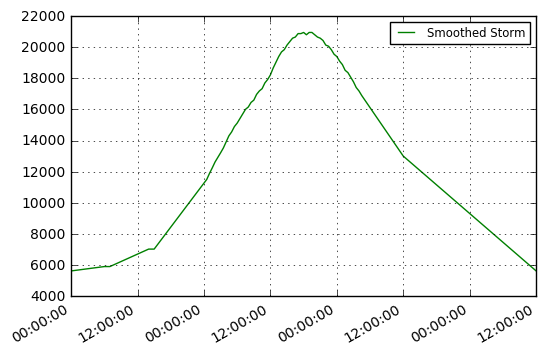

In [3]:
gage_data, data_dir = initialize()
base_storm_1pct = init_base_hydro(gage_data)
smooth_storm = smooth_base_hydro(base_storm_1pct)

In [4]:
data = pd.read_csv('/Users/slawler/Repos/HydrologyTools/sample_data/lisle_event.csv', sep = '\t')
data = data.set_index(pd.DatetimeIndex(data['local']))
data.drop(axis=1,labels =['utc', 'local'], inplace=True)
data = data['2005-04-02 00:00:0':'2005-04-05 12:00:00'].copy()

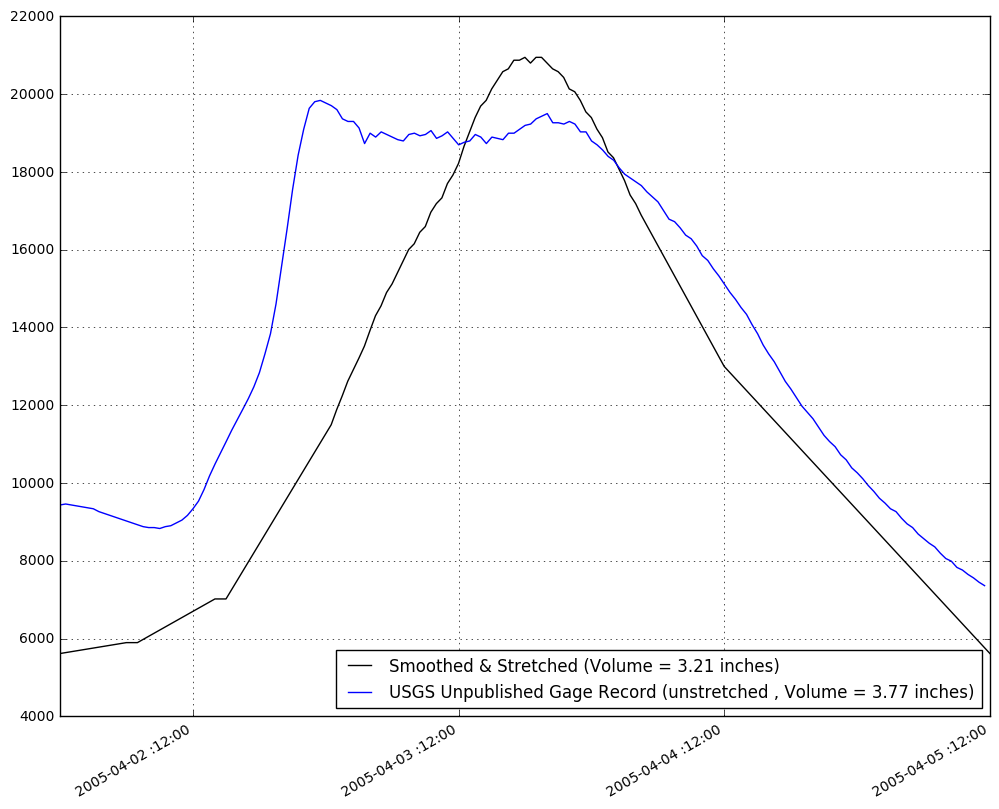

In [8]:
fig, ax = plt.subplots()
x0 = smooth_storm.index
y0 = smooth_storm.values
x1 = data.index
y1 = data.values

smooth_vol = IntegrateHydrograph(smooth_storm, 490, method = 'trapezoid')
gage_vol = IntegrateHydrograph(data, 490, method = 'trapezoid')

ax.plot(x0, y0, color='black', label = 'Smoothed & Stretched (Volume = {} inches)'.format(smooth_vol))
ax.plot(x1, y1, label = 'USGS Unpublished Gage Record (unstretched , Volume = {} inches)'.format(gage_vol))
fig.set_size_inches(12,10)

import matplotlib.dates as mdates

days = mdates.HourLocator(interval = 24)   # every year
dateFmt = mdates.DateFormatter('%Y-%m-%d :%H:%M')
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_major_locator(days)
ax.grid()
fig.autofmt_xdate()
ax.legend(loc= 'best',  fontsize='large')

## Comments:

Note the increase in volume and the flattened shape (longer temporal duration) of the peak. If this hydrograph were to have been stretched to the 1% event peak, the inundation results would have been significatnly greater for all modeled reaches. 